Importing Face Mask Dataset

In [2]:
# API to fetch the dataset from Kaggle
!kaggle datasets download -d ashishjangra27/face-mask-12k-images-dataset

Dataset URL: https://www.kaggle.com/datasets/ashishjangra27/face-mask-12k-images-dataset
License(s): CC0-1.0




  0%|          | 0.00/330M [00:00<?, ?B/s]
  0%|          | 1.00M/330M [00:01<08:41, 663kB/s]
  1%|          | 2.00M/330M [00:02<05:26, 1.06MB/s]
  1%|          | 3.00M/330M [00:02<04:35, 1.25MB/s]
  1%|          | 4.00M/330M [00:03<04:12, 1.35MB/s]
  2%|▏         | 5.00M/330M [00:04<03:59, 1.42MB/s]
  2%|▏         | 6.00M/330M [00:04<03:49, 1.48MB/s]
  2%|▏         | 7.00M/330M [00:05<03:28, 1.62MB/s]
  2%|▏         | 8.00M/330M [00:05<03:08, 1.79MB/s]
  3%|▎         | 9.00M/330M [00:06<02:59, 1.87MB/s]
  3%|▎         | 10.0M/330M [00:06<03:01, 1.86MB/s]
  3%|▎         | 11.0M/330M [00:07<03:14, 1.72MB/s]
  4%|▎         | 12.0M/330M [00:08<03:29, 1.59MB/s]
  4%|▍         | 13.0M/330M [00:08<03:18, 1.67MB/s]
  4%|▍         | 14.0M/330M [00:09<03:15, 1.69MB/s]
  5%|▍         | 15.0M/330M [00:10<03:19, 1.65MB/s]
  5%|▍         | 16.0M/330M [00:10<03:21, 1.64MB/s]
  5%|▌         | 17.0M/330M [00:11<03:17, 1.66MB/s]
  5%|▌         | 18.0M/330M [00:11<03:10, 1.72MB/s]
  6%|▌         | 19.0

In [6]:
# extracting the compessed Dataset
from zipfile import ZipFile
dataset = 'face-mask-12k-images-dataset.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


**Importing the Dependencies**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

In [10]:
with_mask_files = os.listdir('Face Mask Dataset\Train\WithMask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['10.png', '100.png', '1004.png', '1005.png', '1006.png']
['Augmented_9_2039449.png', 'Augmented_9_3820226.png', 'Augmented_9_5371166.png', 'Augmented_9_6521402.png', 'Augmented_9_7903476.png']


<>:1: SyntaxWarning: invalid escape sequence '\T'
<>:1: SyntaxWarning: invalid escape sequence '\T'
C:\Users\Avaneesh\AppData\Local\Temp\ipykernel_5056\4275471390.py:1: SyntaxWarning: invalid escape sequence '\T'
  with_mask_files = os.listdir('Face Mask Dataset\Train\WithMask')


In [64]:
without_mask_files = os.listdir('Face Mask Dataset/Train/WithoutMask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['10.png', '100.png', '1004.png', '1005.png', '1006.png']
['993.png', '994.png', '995.png', '996.png', '997.png']


In [2]:
# Print the number of images in each category for training, test, and validation datasets
with_mask_files = os.listdir('Face Mask Dataset/Train/WithMask')
without_mask_files = os.listdir('Face Mask Dataset/Train/WithoutMask')
test_with_mask_files = os.listdir('Face Mask Dataset/Test/WithMask')
test_without_mask_files = os.listdir('Face Mask Dataset/Test/WithoutMask')
val_with_mask_files = os.listdir('Face Mask Dataset/Validation/WithMask')
val_without_mask_files = os.listdir('Face Mask Dataset/Validation/WithoutMask')

# Training dataset
print('Number of with mask images in training set:', len(with_mask_files))
print('Number of without mask images in training set:', len(without_mask_files))

# Test dataset
print('Number of with mask images in test set:', len(test_with_mask_files))
print('Number of without mask images in test set:', len(test_without_mask_files))

# Validation dataset
print('Number of with mask images in validation set:', len(val_with_mask_files))
print('Number of without mask images in validation set:', len(val_without_mask_files))


Number of with mask images in training set: 5000
Number of without mask images in training set: 5000
Number of with mask images in test set: 483
Number of without mask images in test set: 509
Number of with mask images in validation set: 400
Number of without mask images in validation set: 400


**Creating Labels for the two class of Images**

with mask  -->  1

without mask  -->  0

In [3]:
# create the labels

with_mask_labels = [1]*5000

without_mask_labels = [0]*5000

test_with_mask_labels = [1]*483

test_without_mask_labels = [0]*509

val_with_mask_labels = [1]*400

val_without_mask_labels = [0]*400


In [4]:
print(with_mask_labels[0:5])

print(without_mask_labels[0:5])

print(test_with_mask_labels[0:5])

print(test_without_mask_labels[0:5])

print(val_with_mask_labels[0:5])

print(val_without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]
[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [5]:
print(len(with_mask_labels))
print(len(without_mask_labels))

5000
5000


In [6]:
labels = with_mask_labels + without_mask_labels
test_labels=test_with_mask_labels+test_without_mask_labels
val_labels=val_with_mask_labels+val_without_mask_labels

# Print the length and sample values of labels
print("Training Labels:")
print("Length of training labels:", len(labels))
print("First 5 training labels:", labels[:5])
print("Last 5 training labels:", labels[-5:])

print("\nTesting Labels:")
print("Length of test labels:", len(test_labels))
print("First 5 test labels:", test_labels[:5])
print("Last 5 test labels:", test_labels[-5:])

print("\nValidation Labels:")
print("Length of validation labels:", len(val_labels))
print("First 5 validation labels:", val_labels[:5])
print("Last 5 validation labels:", val_labels[-5:])


Training Labels:
Length of training labels: 10000
First 5 training labels: [1, 1, 1, 1, 1]
Last 5 training labels: [0, 0, 0, 0, 0]

Testing Labels:
Length of test labels: 992
First 5 test labels: [1, 1, 1, 1, 1]
Last 5 test labels: [0, 0, 0, 0, 0]

Validation Labels:
Length of validation labels: 800
First 5 validation labels: [1, 1, 1, 1, 1]
Last 5 validation labels: [0, 0, 0, 0, 0]


**Displaying the Images**

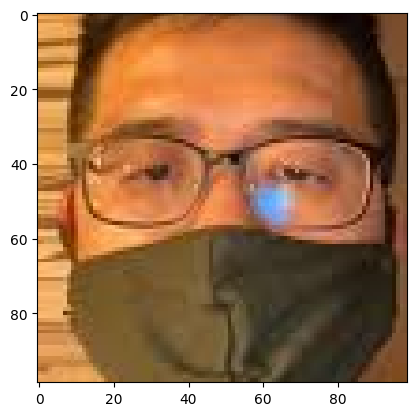

In [7]:
# displaying with mask image
img = mpimg.imread(r'Face Mask Dataset\Train\WithMask\23.png')
imgplot = plt.imshow(img)
plt.show()

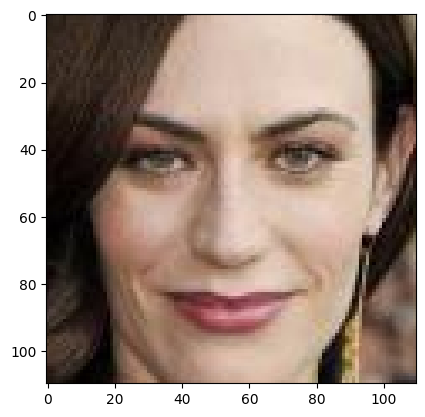

In [8]:
# displaying without mask image
img = mpimg.imread(r'Face Mask Dataset\Train\WithoutMask\23.png')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

1. Resize the Images

2. Convert the images to numpy arrays

In [9]:
import os
from PIL import Image
import numpy as np

# Initialize lists to hold image data
data = []
test_data = []
val_data = []

# Load image filenames
with_mask_files = os.listdir('Face Mask Dataset/Train/WithMask')
without_mask_files = os.listdir('Face Mask Dataset/Train/WithoutMask')
test_with_mask_files = os.listdir('Face Mask Dataset/Test/WithMask')
test_without_mask_files = os.listdir('Face Mask Dataset/Test/WithoutMask')
val_with_mask_files = os.listdir('Face Mask Dataset/Validation/WithMask')
val_without_mask_files = os.listdir('Face Mask Dataset/Validation/WithoutMask')

# Define paths for training, validation, and test datasets
with_mask_path = 'Face Mask Dataset/Train/WithMask/'
without_mask_path = 'Face Mask Dataset/Train/WithoutMask/'
test_with_mask_path = 'Face Mask Dataset/Test/WithMask/'
test_without_mask_path = 'Face Mask Dataset/Test/WithoutMask/'
val_with_mask_path = 'Face Mask Dataset/Validation/WithMask/'
val_without_mask_path = 'Face Mask Dataset/Validation/WithoutMask/'

# Load training images with mask
for img_file in with_mask_files:
    image = Image.open(os.path.join(with_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Load training images without mask
for img_file in without_mask_files:
    image = Image.open(os.path.join(without_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    data.append(image)

# Load test images with mask
for img_file in test_with_mask_files:
    image = Image.open(os.path.join(test_with_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    test_data.append(image)

# Load test images without mask
for img_file in test_without_mask_files:
    image = Image.open(os.path.join(test_without_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    test_data.append(image)

# Load validation images with mask
for img_file in val_with_mask_files:
    image = Image.open(os.path.join(val_with_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    val_data.append(image)

# Load validation images without mask
for img_file in val_without_mask_files:
    image = Image.open(os.path.join(val_without_mask_path, img_file))
    image = image.resize((128, 128))
    image = image.convert('RGB')
    image = np.array(image)
    val_data.append(image)


In [10]:
type(data)
type(test_data)
type(val_data)

list

In [11]:
print(len(data))
print(len(test_data))
print(len(val_data))

10000
992
800


In [12]:
data[0]

array([[[239, 238, 236],
        [239, 238, 236],
        [239, 238, 236],
        ...,
        [204, 199, 193],
        [204, 199, 193],
        [204, 199, 193]],

       [[239, 238, 236],
        [239, 238, 236],
        [239, 238, 236],
        ...,
        [201, 196, 190],
        [202, 197, 191],
        [202, 197, 191]],

       [[238, 237, 235],
        [238, 237, 235],
        [239, 238, 236],
        ...,
        [197, 192, 186],
        [199, 194, 188],
        [199, 194, 188]],

       ...,

       [[236, 236, 236],
        [236, 236, 236],
        [236, 236, 236],
        ...,
        [151, 152, 147],
        [152, 153, 148],
        [152, 153, 148]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [151, 152, 147],
        [152, 153, 148],
        [152, 153, 148]],

       [[235, 235, 235],
        [235, 235, 235],
        [235, 235, 235],
        ...,
        [151, 152, 147],
        [152, 153, 148],
        [152, 153, 148]]

In [13]:
type(data[0])

numpy.ndarray

In [14]:
data[0].shape

(128, 128, 3)

In [15]:
# converting image list and label list to numpy arrays

X_train = np.asarray(data)
Y_train = np.asarray(labels)

X_test=np.asarray(test_data)
Y_test=np.asarray(test_labels)

X_val=np.asarray(val_data)
Y_val=np.asarray(val_labels)

In [16]:
print(Y_train)
print(Y_test)
print(Y_val)

[1 1 1 ... 0 0 0]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 

**Train Test Split**

In [17]:
print( X_train.shape, X_test.shape,X_val.shape)

(10000, 128, 128, 3) (992, 128, 128, 3) (800, 128, 128, 3)


In [18]:
# scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

X_val_scaled = X_val / 255.0

**Building a Convolutional Neural Networks (CNN)**

In [19]:
import tensorflow as tf
from tensorflow import keras

In [20]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))


model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

C:\Users\Avaneesh\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [22]:
# Assuming X_val_scaled and Y_val are your validation data and labels
history = model.fit(X_train_scaled, Y_train, validation_data=(X_val_scaled, Y_val), epochs=5)


Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 101ms/step - acc: 0.8574 - loss: 0.3494 - val_acc: 0.9675 - val_loss: 0.0714
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 99ms/step - acc: 0.9768 - loss: 0.0688 - val_acc: 0.9463 - val_loss: 0.1590
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 95ms/step - acc: 0.9797 - loss: 0.0663 - val_acc: 0.9925 - val_loss: 0.0238
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 29s 94ms/step - acc: 0.9844 - loss: 0.0451 - val_acc: 0.9937 - val_loss: 0.0226
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 30s 97ms/step - acc: 0.9900 - loss: 0.0290 - val_acc: 0.9900 - val_loss: 0.0293


**Model Evaluation**

In [23]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - acc: 0.9799 - loss: 0.0774
Test Accuracy = 0.9899193644523621


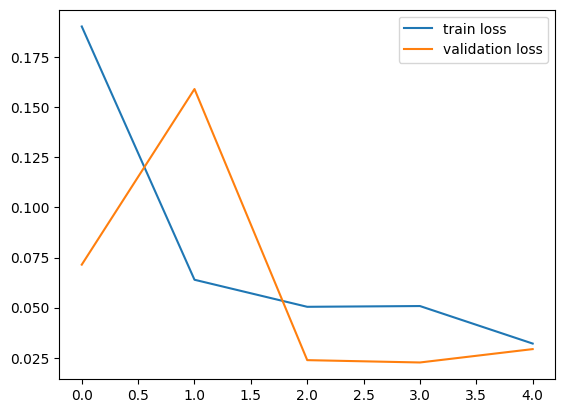

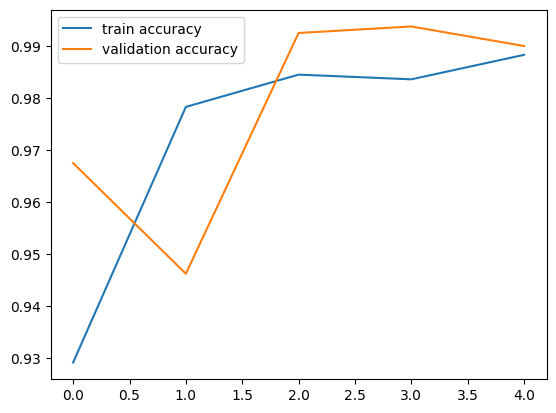

In [24]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

model.save('mask_detect.h5')

**Predictive System**

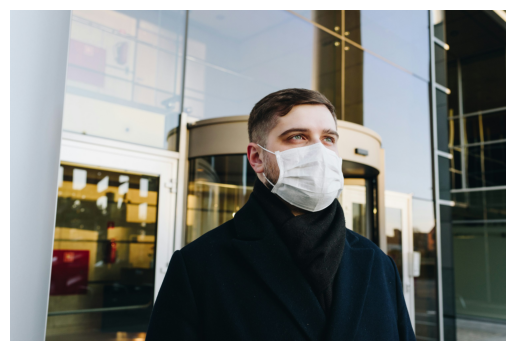

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
[[7.9905831e-06 9.9774355e-01]]
1
The person in the image is wearing a mask


In [27]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# Load the saved model
model = load_model('mask_detect.h5')

# Read the image
input_image_path = r'photo-1584309832315-39d404eecc77.jpeg'
input_image = cv2.imread(input_image_path)

# Convert BGR to RGB
input_image_rgb = cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(input_image_rgb)
plt.axis('off')  # Hide axis
plt.show()

# Resize the image
input_image_resized = cv2.resize(input_image_rgb, (128, 128))

# Scale the image
input_image_scaled = input_image_resized / 255.0

# Reshape the image for model prediction
input_image_reshaped = np.reshape(input_image_scaled, [1, 128, 128, 3])

# Make the prediction
input_prediction = model.predict(input_image_reshaped)

# Print the prediction
print(input_prediction)

# Get the predicted label
input_pred_label = np.argmax(input_prediction, axis=1)[0]
print(input_pred_label)

# Print the result based on the predicted label
if input_pred_label == 1:
    print('The person in the image is wearing a mask')
else:
    print('The person in the image is not wearing a mask')
